# Projeto análise de dados - Dados sobre COVID-19 em Pernambuco de 2020 a 2023  

Esse projeto visa entender como foi o comportamento de casos e óbitos da COVID-19 em Pernambuco.

## Processamento

In [1]:
# Importando bibliotecas que serão utilizidas
import os
import pandas as pd
import os

In [2]:
# Manipulando diretorios 
PATH_DIR = os.getcwd()
DATA_DIR = os.path.join(PATH_DIR, "..", "data")
DATA_PATH = [os.path.join(DATA_DIR, name) for name in os.listdir(DATA_DIR)]

In [3]:
# Manipulando diretorios de saida
PATH_OUTPUT = os.path.join(PATH_DIR, "output")
PATH_DATA_OUTPUT = os.path.join(PATH_OUTPUT, "report_pernambuco.csv")

In [4]:
years = ["2020", "2021", "2022", "2023"]

In [5]:
# Separando  caminhos de cada ano
PATHS_YEARS = {}

for year in years:
  PATHS_YEARS[year] = list(filter(lambda x: (year in x and ".zip" in x),  DATA_PATH))

In [6]:
PATHS_YEARS

{'2020': ['c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2020_Parte1_25abr2024.zip',
  'c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2020_Parte2_25abr2024.zip'],
 '2021': ['c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2021_Parte1_25abr2024.zip',
  'c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2021_Parte2_25abr2024.zip'],
 '2022': ['c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2022_Parte1_25abr2024.zip',
  'c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2022_Parte2_25abr2024.zip'],
 '2023': ['c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\data\\HIST_PAINEL_COVIDBR_2023_Parte1_25abr2024.zip',
  'c:\\Users\\Vitor\\Desktop\\workspace\\estudos_python\\numpy\\src\\..\\dat

In [7]:
# Carregando dados
dfs_years = {}

for year in PATHS_YEARS:
  for path in PATHS_YEARS[year]:
    df = pd.read_csv(path, sep=";", encoding="utf-8")
    
    if year not in dfs_years:
      dfs_years[year] = df
    else:
      dfs_years[year] = pd.concat([dfs_years[year], df])

In [8]:
# Enxergando a tabela
dfs_years["2021"]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-01,53,210147125.0,7700578.0,24605,195411,462,6747065.0,733959.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-02,53,210147125.0,7716405.0,15827,195725,314,6756284.0,748883.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-03,1,210147125.0,7733746.0,17341,196018,293,6769420.0,751260.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-04,1,210147125.0,7753752.0,20006,196561,543,6813008.0,724720.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2021-01-05,1,210147125.0,7810400.0,56648,197732,1171,6875230.0,681961.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033891,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-27,52,3015268.0,519103.0,225,11100,5,NaN,NaN,1.0
1033892,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-28,52,3015268.0,519196.0,93,11104,4,NaN,NaN,1.0
1033893,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-29,52,3015268.0,519346.0,150,11105,1,NaN,NaN,1.0
1033894,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2021-12-30,52,3015268.0,519546.0,200,11107,2,NaN,NaN,1.0


In [9]:
# Filtrando para dados de pernambuco
dfs_years_pernambuco= {}

for year in years:
  df = dfs_years[year]
  df = df[df["estado"] == "PE"]
  df = df[df["municipio"].isna()]
  df = df[df["codmun"].isna()]
  dfs_years_pernambuco[year] = df.reset_index(drop=True)  

dfs_years_pernambuco["2021"]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-01-01,53,9557071.0,222993.0,827,9666,12,NaN,NaN,NaN
1,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-01-02,53,9557071.0,223325.0,332,9674,8,NaN,NaN,NaN
2,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-01-03,1,9557071.0,223540.0,215,9679,5,NaN,NaN,NaN
3,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-01-04,1,9557071.0,223845.0,305,9691,12,NaN,NaN,NaN
4,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-01-05,1,9557071.0,225336.0,1491,9709,18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-12-27,52,9557071.0,644189.0,96,20414,5,NaN,NaN,NaN
361,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-12-28,52,9557071.0,644517.0,328,20421,7,NaN,NaN,NaN
362,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-12-29,52,9557071.0,644852.0,335,20431,10,NaN,NaN,NaN
363,Nordeste,PE,NaN,26,NaN,NaN,NaN,2021-12-30,52,9557071.0,645225.0,373,20440,9,NaN,NaN,NaN


In [10]:
for year in years:
  df = dfs_years_pernambuco[year]
  print(df.shape)

(311, 17)
(365, 17)
(365, 17)
(365, 17)


## Limpando e tratando dados

In [11]:
for year in years:
  print(f"ANO: {year}")
  df = dfs_years_pernambuco[f"{year}"]
  print(df.isnull().sum(), end="\n\n")

ANO: 2020
regiao                      0
estado                      0
municipio                 311
coduf                       0
codmun                    311
codRegiaoSaude            311
nomeRegiaoSaude           311
data                        0
semanaEpi                   0
populacaoTCU2019            0
casosAcumulado              0
casosNovos                  0
obitosAcumulado             0
obitosNovos                 0
Recuperadosnovos          311
emAcompanhamentoNovos     311
interior/metropolitana    311
dtype: int64

ANO: 2021
regiao                      0
estado                      0
municipio                 365
coduf                       0
codmun                    365
codRegiaoSaude            365
nomeRegiaoSaude           365
data                        0
semanaEpi                   0
populacaoTCU2019            0
casosAcumulado              0
casosNovos                  0
obitosAcumulado             0
obitosNovos                 0
Recuperadosnovos          365
emAcom

In [12]:
for year in years:
  print(f"ANO: {year}")
  df = dfs_years_pernambuco[year]
  print(df.info(), end="\n\n")

ANO: 2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   regiao                  311 non-null    object 
 1   estado                  311 non-null    object 
 2   municipio               0 non-null      object 
 3   coduf                   311 non-null    int64  
 4   codmun                  0 non-null      float64
 5   codRegiaoSaude          0 non-null      float64
 6   nomeRegiaoSaude         0 non-null      object 
 7   data                    311 non-null    object 
 8   semanaEpi               311 non-null    int64  
 9   populacaoTCU2019        311 non-null    float64
 10  casosAcumulado          311 non-null    int64  
 11  casosNovos              311 non-null    int64  
 12  obitosAcumulado         311 non-null    int64  
 13  obitosNovos             311 non-null    int64  
 14  Recuperadosnovos        0 non-nu

In [13]:
# Verificando se de fato só tem dados do Brasil e não dos seus estados
for year in years:
  print(f"ANO: {year}")
  df = dfs_years_pernambuco[year]
  print(df["municipio"].unique())
  print(df["estado"].unique())

ANO: 2020
[nan]
['PE']
ANO: 2021
[nan]
['PE']
ANO: 2022
[nan]
['PE']
ANO: 2023
[nan]
['PE']


In [14]:
# Salvando numero de populacao
population_brazil = int(df["populacaoTCU2019"].iloc[0])
population_brazil

9557071

In [15]:
# Excluindo colunas desnecessarias
# Verificando se de fato só tem dados do Brasil e não dos seus estados
for year in years:
  print(f"ANO: {year}")
  df = dfs_years_pernambuco[year]

  dfs_years_pernambuco[year] = df.drop(columns=[
    "estado", "municipio", "coduf", "codmun", "codRegiaoSaude", "nomeRegiaoSaude", "populacaoTCU2019", "interior/metropolitana", "regiao", "Recuperadosnovos", "emAcompanhamentoNovos"
  ])
  
  display(dfs_years_pernambuco[year])

ANO: 2020


,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2020-02-25,9,0,0,0,0
1,2020-02-26,9,0,0,0,0
2,2020-02-27,9,0,0,0,0
3,2020-02-28,9,0,0,0,0
4,2020-02-29,9,0,0,0,0
...,...,...,...,...,...,...
306,2020-12-27,53,215552,603,9571,11
307,2020-12-28,53,215994,442,9588,17
308,2020-12-29,53,217772,1778,9612,24
309,2020-12-30,53,220284,2512,9612,0


ANO: 2021


,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2021-01-01,53,222993.0,827,9666,12
1,2021-01-02,53,223325.0,332,9674,8
2,2021-01-03,1,223540.0,215,9679,5
3,2021-01-04,1,223845.0,305,9691,12
4,2021-01-05,1,225336.0,1491,9709,18
...,...,...,...,...,...,...
360,2021-12-27,52,644189.0,96,20414,5
361,2021-12-28,52,644517.0,328,20421,7
362,2021-12-29,52,644852.0,335,20431,10
363,2021-12-30,52,645225.0,373,20440,9


ANO: 2022


,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2022-01-01,52,645887.0,206,20454,7
1,2022-01-02,1,645946.0,59,20460,6
2,2022-01-03,1,646004.0,58,20465,5
3,2022-01-04,1,646276.0,272,20473,8
4,2022-01-05,1,646788.0,512,20481,8
...,...,...,...,...,...,...
360,2022-12-27,52,1119407.0,1332,22566,6
361,2022-12-28,52,1120714.0,1307,22570,4
362,2022-12-29,52,1122012.0,1298,22576,6
363,2022-12-30,52,1122935.0,923,22579,3


ANO: 2023


,data,semanaEpi,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
0,2023-01-01,1,1122935,0,22579,0
1,2023-01-02,1,1123596,661,22579,0
2,2023-01-03,1,1124279,683,22583,4
3,2023-01-04,1,1125192,913,22583,0
4,2023-01-05,1,1126374,1182,22589,6
...,...,...,...,...,...,...
360,2023-12-27,52,1208834,0,23179,0
361,2023-12-28,52,1208834,0,23179,0
362,2023-12-29,52,1208834,0,23179,0
363,2023-12-30,52,1211807,2973,23192,13


In [16]:
# Formatando as datas
for year in years:
  df = dfs_years_pernambuco[year]
  df["data"] = pd.to_datetime(df["data"], format="%Y-%m-%d")

In [17]:
# Listando os tipos
for year in years:
  print(f"ANO {year}")
  print(dfs_years_pernambuco[year].info())


ANO 2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             311 non-null    datetime64[ns]
 1   semanaEpi        311 non-null    int64         
 2   casosAcumulado   311 non-null    int64         
 3   casosNovos       311 non-null    int64         
 4   obitosAcumulado  311 non-null    int64         
 5   obitosNovos      311 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 14.7 KB
None
ANO 2021
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             365 non-null    datetime64[ns]
 1   semanaEpi        365 non-null    int64         
 2   casosAcumulado   365 non-null    float64       
 3   casosNovos       

In [18]:
# Transformando casos acumulados em int64
# Listando os tipos
for year in years:
  df = dfs_years_pernambuco[year]
  df["casosAcumulado"] = df["casosAcumulado"].astype("int64")

In [19]:
for year in years:
  df = dfs_years_pernambuco[year]
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             311 non-null    datetime64[ns]
 1   semanaEpi        311 non-null    int64         
 2   casosAcumulado   311 non-null    int64         
 3   casosNovos       311 non-null    int64         
 4   obitosAcumulado  311 non-null    int64         
 5   obitosNovos      311 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 14.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             365 non-null    datetime64[ns]
 1   semanaEpi        365 non-null    int64         
 2   casosAcumulado   365 non-null    int64         
 3   casosNovos       365 non-null    int64  

## Análise exploratória de dados

In [20]:
# Importando bibliotecas que serão utilizidas
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

### Análises

#### Medidas estatísticas na análise descritiva

In [21]:
# Analisando o compotamento das variáveis
for year in years:
  print(f"ANO {year}")
  df = dfs_years_pernambuco[year]
  display(df.drop(columns=["data", "semanaEpi"]).describe().iloc[1:].round(2))

ANO 2020


,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
mean,90959.14,714.36,5230.64,31.04
std,70999.13,544.81,3517.54,28.66
min,0.00,0.00,0.00,-37.00
25%,14605.00,246.50,1190.50,11.00
50%,91536.00,666.00,6484.00,23.00
75%,154453.50,1062.00,8447.00,44.00
max,222166.00,2512.00,9654.00,140.00


ANO 2021


,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
mean,491497.24,1160.32,16241.36,29.57
std,144075.75,1009.66,3810.75,24.12
min,222993.00,7.00,9666.00,2.00
25%,353997.00,374.00,12295.00,10.00
50%,554688.00,787.00,17766.00,23.00
75%,621192.00,1759.00,19747.00,45.00
max,645681.00,6487.00,20447.00,111.00


ANO 2022


,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
mean,954271.78,1307.55,21779.54,5.84
std,129344.04,1640.34,608.62,4.46
min,645887.00,0.00,20454.00,0.00
25%,900432.00,251.00,21430.00,4.00
50%,982322.00,779.00,21876.00,5.00
75%,1058778.00,1669.00,22299.00,7.00
max,1122935.00,12825.00,22579.00,30.00


ANO 2023


,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos
mean,1178850.42,243.48,22915.85,1.68
std,20723.54,588.61,189.56,4.90
min,1122935.00,0.00,22579.00,0.00
25%,1164629.00,0.00,22733.00,0.00
50%,1186959.00,0.00,22939.00,0.00
75%,1195612.00,0.00,23106.00,0.00
max,1211807.00,4182.00,23192.00,39.00


In [27]:
# Agrupando novos casos e obitos por semana
dfs_deads_and_cases = {}

for year in years:
  print(f"ANO {year}")
  df = dfs_years_pernambuco[year]
  df = df.drop(columns=["casosAcumulado", "obitosAcumulado", "data"]).groupby("semanaEpi").sum()
  dfs_deads_and_cases[year] = df
  display(df.head())

ANO 2020


,casosNovos,obitosNovos
semanaEpi,,
9,0,0
10,0,0
11,2,0
12,28,0
13,38,5


ANO 2021


,casosNovos,obitosNovos
semanaEpi,,
1,7566,152
2,9714,167
3,9560,184
4,10514,155
5,9258,149


ANO 2022


,casosNovos,obitosNovos
semanaEpi,,
1,2969,47
2,5910,43
3,12446,37
4,27882,46
5,33424,95


ANO 2023


,casosNovos,obitosNovos
semanaEpi,,
1,4696,16
2,5538,11
3,5690,14
4,6027,16
5,3147,14


#### Análise Univariada

Casos acumulados

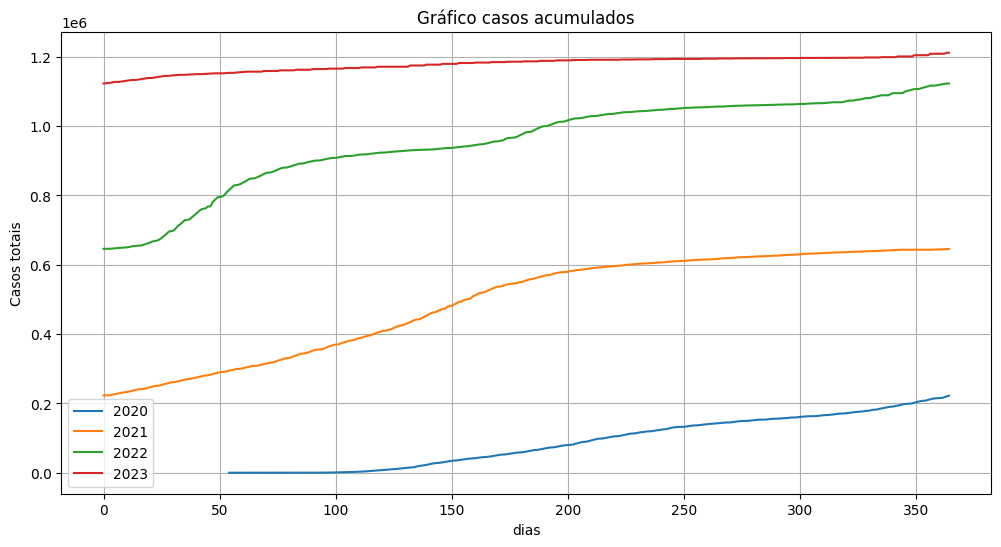

In [23]:
plt.subplots(figsize=(12, 6))

for year in years:
  df = dfs_years_pernambuco[year]
  index = df.index.values
  if year == "2020":
    index += 54
  plt.plot(index, df["casosAcumulado"], label=f"{year}")


plt.title("Gráfico casos acumulados")
plt.ylabel("Casos totais")
plt.xlabel("dias")

plt.legend()
plt.grid(True)

plt.show()

Novos Casos

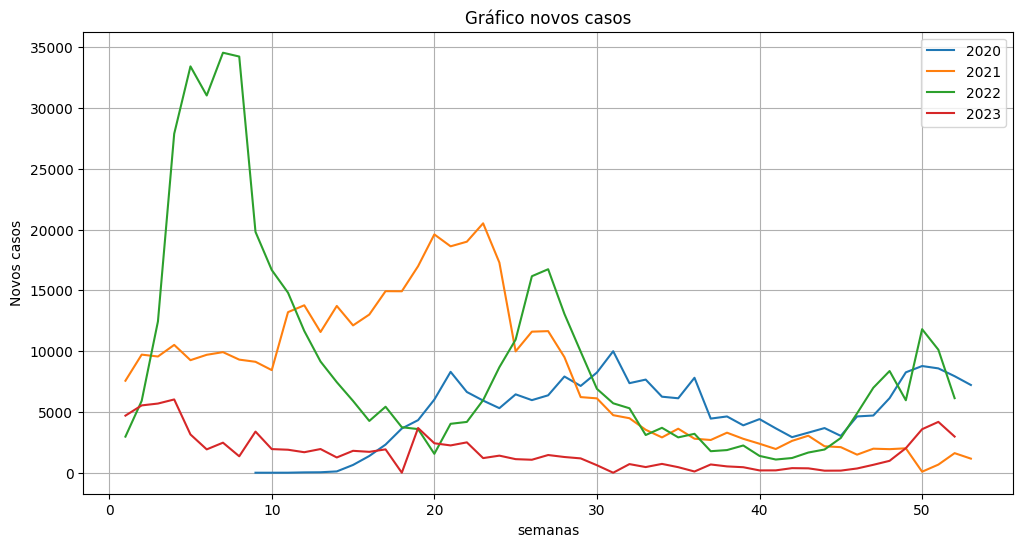

In [24]:
plt.subplots(figsize=(12, 6))

for year in years:
  df = dfs_deads_and_cases[year]

  plt.plot(df.index.values, df["casosNovos"], label=f"{year}")


plt.title("Gráfico novos casos")
plt.ylabel("Novos casos")
plt.xlabel("semanas")

plt.legend()
plt.grid(True)

plt.show()

Óbitos acumulados

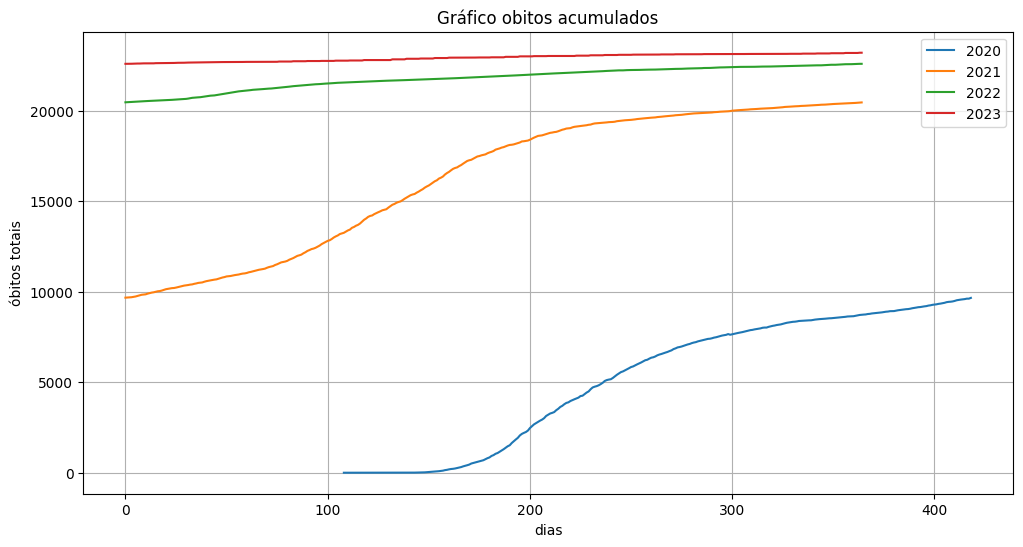

In [25]:
plt.subplots(figsize=(12, 6))

for year in years:
  df = dfs_years_pernambuco[year]
  index = df.index.values
  if year == "2020":
    index += 54
  plt.plot(index, df["obitosAcumulado"], label=f"{year}")


plt.title("Gráfico obitos acumulados")
plt.ylabel("óbitos totais")
plt.xlabel("dias")

plt.legend()
plt.grid(True)

plt.show()

Novos Óbitos

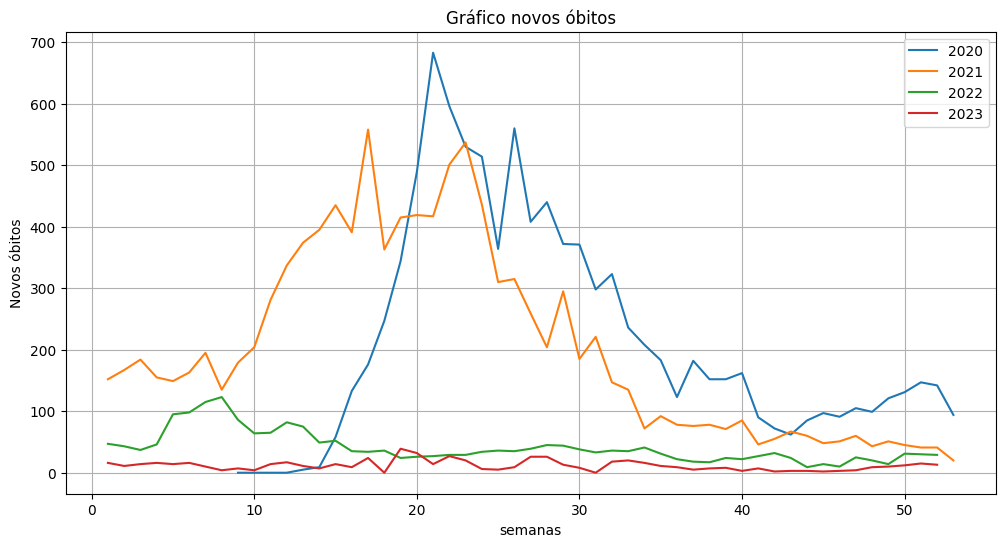

In [26]:
plt.subplots(figsize=(12, 6))

for year in years:
  df = dfs_deads_and_cases[year]

  plt.plot(df.index.values, df["obitosNovos"], label=f"{year}")


plt.title("Gráfico novos óbitos")
plt.ylabel("Novos óbitos")
plt.xlabel("semanas")

plt.legend()
plt.grid(True)

plt.show()